27.02.2018 -- Email from Steve: 

    - talked about comparing surface snowfall rates (SSR) 
    - with cloud snow water contents (SWC)
    
$\rightarrow$ make plots of SSR versus SWC (at the lowest level in the model) for heavily snowing periods during the event



In [1]:
import sys
sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/')
sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/weather_mast/')
import netCDF4
import fill_values as fv
import datetime
import calc_date as cd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import save_fig as SF
import createFolder as cF

In [2]:
def get_variable(file,lv,var_name):
    fn = dict() 
    time = dict()
    variable_ml = dict()
    lead_time = dict()

    for ens_memb in range(0,10):
    # read in the netcdf file
        fn[ens_memb] = netCDF4.Dataset(file[ens_memb],'r')
    

        #fn_SSR[0].variables['pressure_ml'][:,0] lowest level

# initialisation time for plotting
        time[ens_memb] = fn[ens_memb].variables['time']
        time[ens_memb] = fv.fill_nan(time[ens_memb][:])
        ini_day = (datetime.datetime.utcfromtimestamp(time[0][0]).day)   # day of initialisation
        hh = (datetime.datetime.utcfromtimestamp(time[0][0]).hour)       # first hour of initialisation
        yr = datetime.datetime.utcfromtimestamp(time[0][0]).year
        mm = datetime.datetime.utcfromtimestamp(time[0][0]).month
        calday, calmon = cd.get_dayname(yr, mm, ini_day)
# Read in the variable name 
        variable_ml[ens_memb] = fn[ens_memb].variables[var_name]

# lead time
        lead_time[ens_memb] = np.arange(0,time[ens_memb].shape[0])
# get only valuable values not nan
    #substitute missing values with nan 
        variable_ml[ens_memb] = fv.fill_nan(variable_ml[ens_memb][:,lv])
# get only valuable values not nan
        time[ens_memb] = time[ens_memb][~np.isnan(time[ens_memb])]
        lead_time[ens_memb] = lead_time[ens_memb][~np.isnan(variable_ml[ens_memb])]
        variable_ml[ens_memb] = variable_ml[ens_memb][~np.isnan(variable_ml[ens_memb])]
        
        fn[ens_memb].close()

    return(time, variable_ml, lead_time, ini_day, calday, calmon);

In [3]:
year = '2016'
month = '12'
#day = '26'
t = ['20', '21', '22', '23', '24', '25', '26', '27']
tid = '00'
station = 'Haukeliseter'

figdir = '../../Figures/MEPS/snowfall_amount'
cF.createFolder('%s/' %(figdir))
form = 'png'


level = 'sfc'
nc_dir_sfc = '../../Data/MEPS/%s/%s_%s' %(station,level,tid)
level = 'ml'
nc_dir_ml = '../../Data/MEPS/%s/%s_%s' %(station,level,tid)

In [4]:
var_name_SSR = 'snowfall_amount'
var_name_SWC = 'snowfall_amount_ml'
SSR_dir = '%s' %(nc_dir_sfc)
SWC_dir = '%s/%s' %(nc_dir_ml,var_name_SWC)

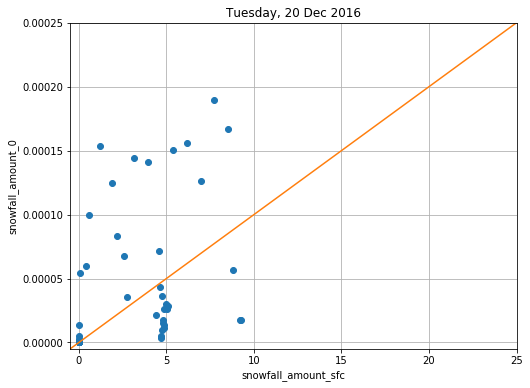

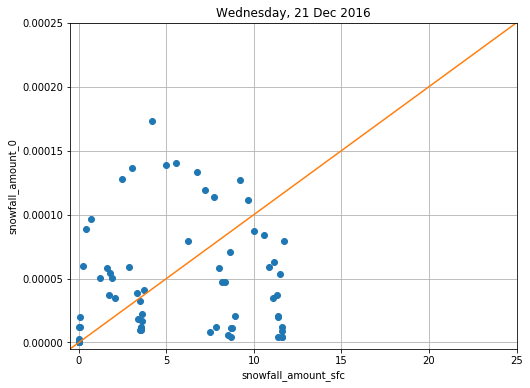

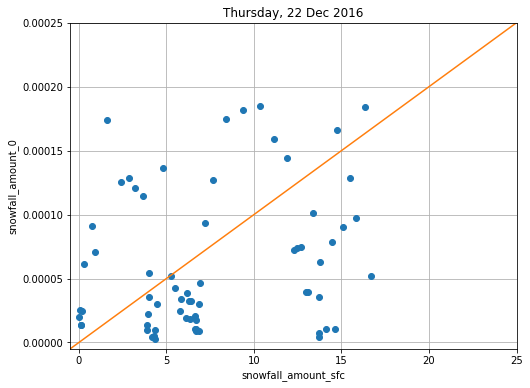

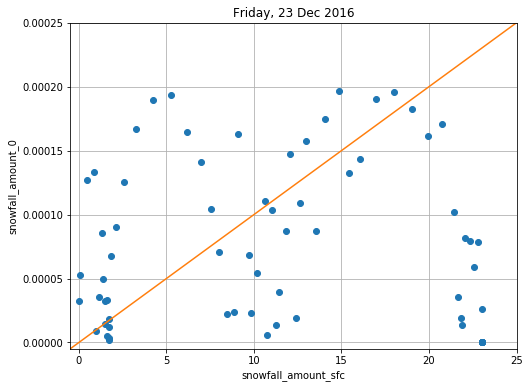

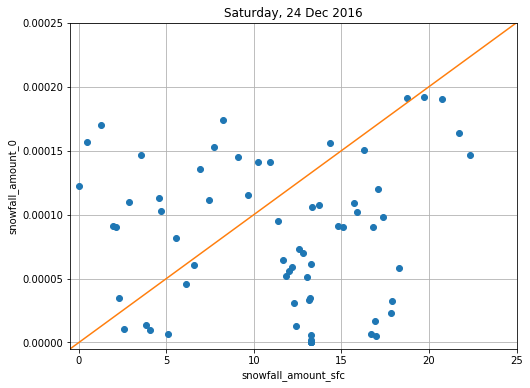

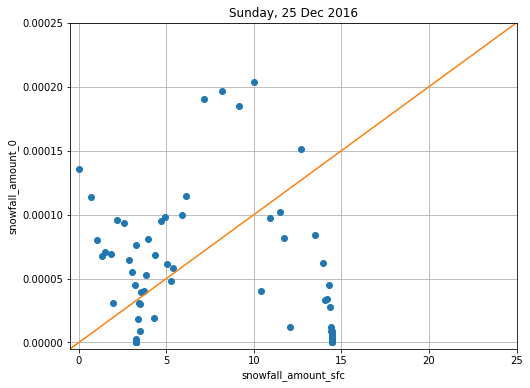

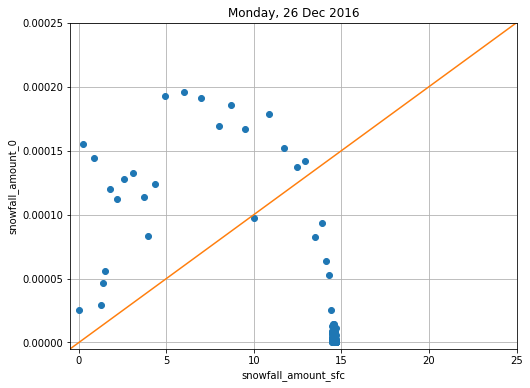

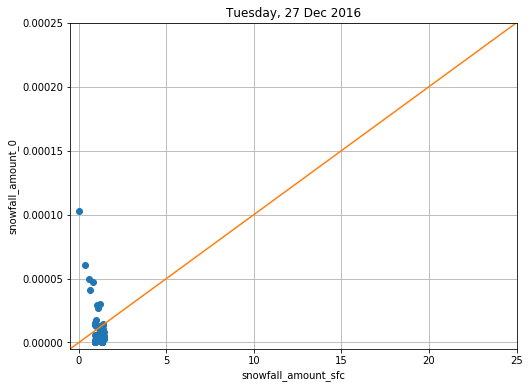

In [8]:
for day in t:
    SSR_file = dict()
    SWC_file = dict()
    for ens_memb in range(0,10):
        SSR_file[ens_memb] = '%s/%s%s%s_%s_%s.nc' %(SSR_dir,year,month,day,tid,ens_memb)
        SWC_file[ens_memb] = '%s/%s%s%s_%s_%s.nc' %(SWC_dir,year,month,day,tid,ens_memb)

    


#var_name_SWC = 'atmosphere_cloud_ice_content_ml'
#SWC_dir = '%s/%s' %(nc_dir,var_name_SWC
    ml = 0
    time_SSR, snowfall_amount_sfc, lead_time_SSR, ini_day_SSR, calday_SSR, calmon_SSR =  get_variable(SSR_file, 
                                                                                                 ml, var_name_SSR)
    ml = 1
    time_SWC, snowfall_amount_ml, lead_time_SWC, ini_day_SWC, calday_SWC, calmon_SWC =  get_variable(SWC_file, 
                                                                                                 ml, var_name_SWC)


    fig_name = '%s%s%s.png' %(year,month,ini_day_SWC)

    plt.figure(figsize = (8,6))
    plt.subplot(111)
    plt.plot(snowfall_amount_sfc[0],snowfall_amount_ml[0],'o')
    plt.plot([-0.5, 25], [-0.000005, 0.00025], '-')
    plt.ylabel('snowfall_amount_0')
    plt.xlabel('snowfall_amount_sfc')
    plt.xlim([-0.5,25])
    plt.ylim([-0.000005,0.00025])
    plt.title('%s, %s %s %s' %(calday_SWC,ini_day_SWC,calmon_SWC,year))
    plt.grid()
    plt.tight_layout

    SF.save_figure_landscape(figdir, fig_name, form)
    plt.show()
    plt.close()
    
